<a href="https://colab.research.google.com/github/Flibbertigibbert/Sales_Data_Analysis/blob/main/DME_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/My Projects/Sales Report_Challenge/Sales Data.xlsx")

In [ ]:
print(df.shape)
df.head()

(607, 5)


,Products,Transaction Date,Currency,Total,Your Profit
0,DATA ANALYSIS MADE EASY,2023-09-09 16:06:00,USD,15.0,13.45
1,DATA ANALYSIS MADE EASY,2023-08-09 13:12:00,NGN,5500.0,5230.00
2,DATA ANALYSIS MADE EASY,2023-08-09 12:12:00,NGN,5500.0,5230.00
3,DATA ANALYSIS MADE EASY,2023-07-09 21:20:00,UGX,23824.0,21893.92
4,DATA ANALYSIS MADE EASY,2023-06-09 07:24:00,NGN,5500.0,5230.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Products          607 non-null    object 
 1   Transaction Date  607 non-null    object 
 2   Currency          607 non-null    object 
 3   Total             607 non-null    float64
 4   Your Profit       607 non-null    float64
dtypes: float64(2), object(3)
memory usage: 23.8+ KB


In [ ]:
df.describe()

,Total,Your Profit
count,607.000000,607.000000
mean,3163.175371,2925.822293
std,3475.032783,3151.085664
min,4.190000,3.400000
25%,15.000000,13.450000
50%,2750.000000,2590.000000
75%,5500.000000,5230.000000
max,44143.000000,40994.030000


In [ ]:
df['Products'].value_counts()

DATA ANALYSIS MADE EASY                                  599
TECHIES GUIDE TO MASTERING SOFT SKILLS IN A WORKPLACE      6
12 Strategies to Grow Your Twitter Followers               2
Name: Products, dtype: int64

In [ ]:
df = df[df['Products'] == "DATA ANALYSIS MADE EASY"]

In [ ]:
df['Currency'].unique()

array(['USD', 'NGN', 'UGX', 'GHS', 'ZAR', 'TZS', 'KES', 'GBP', 'XAF',
       'RWF'], dtype=object)

In [ ]:
# Exchange rate as at 22/09/2023 on https://www.xe.com/currencyconverter/convert/
data = {'Currency': ['USD', 'NGN', 'UGX', 'GHS', 'ZAR', 'TZS', 'KES', 'GBP', 'XAF', 'RWF'],
        'Exchange Rate': [767.84, 1.0, 0.21, 66.61, 40.95, 0.31, 5.20, 941.49, 1.25, 0.64]}
exchange_rates = pd.DataFrame(data)

# Merge the sales_data with exchange_rates to get exchange rates for each row
df = df.merge(exchange_rates, on='Currency', how='left')

In [ ]:
df.head()

,Products,Transaction Date,Currency,Total,Your Profit,Exchange Rate
0,DATA ANALYSIS MADE EASY,2023-09-09 16:06:00,USD,15.0,13.45,767.84
1,DATA ANALYSIS MADE EASY,2023-08-09 13:12:00,NGN,5500.0,5230.00,1.00
2,DATA ANALYSIS MADE EASY,2023-08-09 12:12:00,NGN,5500.0,5230.00,1.00
3,DATA ANALYSIS MADE EASY,2023-07-09 21:20:00,UGX,23824.0,21893.92,0.21
4,DATA ANALYSIS MADE EASY,2023-06-09 07:24:00,NGN,5500.0,5230.00,1.00


In [ ]:
df["Total_SalesNGN"] = df["Total"] * df["Exchange Rate"]
df["Profit_NGN"] = df["Your Profit"] * df["Exchange Rate"]

#drop the total, exchange rate and your profit column
df.drop(["Total", "Your Profit","Exchange Rate"], axis=1, inplace=True)

In [ ]:
#Convert Transaction data to datetime
df["Transaction Date"] = pd. to_datetime(df["Transaction Date"], utc=True)

# Extract year, month, day, and hour
df['year'] = df["Transaction Date"].dt.year
df['month'] = df["Transaction Date"].dt.month.apply(lambda x: calendar.month_name[x])
df['day'] = df["Transaction Date"].dt.strftime('%A')
df['hour'] = df["Transaction Date"].dt.hour

# EDA

In [ ]:
df.head()

,Products,Currency,Total_SalesNGN,Profit_NGN,year,month,day,hour,YearMonth
Transaction Date,,,,,,,,,
2023-09-09 16:06:00+00:00,DATA ANALYSIS MADE EASY,USD,11517.60,10327.4480,2023,September,Saturday,16,2023-09
2023-08-09 13:12:00+00:00,DATA ANALYSIS MADE EASY,NGN,5500.00,5230.0000,2023,August,Wednesday,13,2023-08
2023-08-09 12:12:00+00:00,DATA ANALYSIS MADE EASY,NGN,5500.00,5230.0000,2023,August,Wednesday,12,2023-08
2023-07-09 21:20:00+00:00,DATA ANALYSIS MADE EASY,UGX,5003.04,4597.7232,2023,July,Sunday,21,2023-07
2023-06-09 07:24:00+00:00,DATA ANALYSIS MADE EASY,NGN,5500.00,5230.0000,2023,June,Friday,7,2023-06


In [ ]:
df["Transaction Date"].head(100)

0    2023-09-09 16:06:00+00:00
1    2023-08-09 13:12:00+00:00
2    2023-08-09 12:12:00+00:00
3    2023-07-09 21:20:00+00:00
4    2023-06-09 07:24:00+00:00
                ...           
95   2023-08-27 03:35:00+00:00
96   2023-08-26 12:22:00+00:00
97   2023-08-26 07:48:00+00:00
98   2023-08-25 23:34:00+00:00
99   2023-08-24 10:30:00+00:00
Name: Transaction Date, Length: 100, dtype: datetime64[ns, UTC]

# Total Sales Distribution

## 1. How has the sales performance changed over the months?
**Which month has the highest sales revenue, and which had the lowest?**

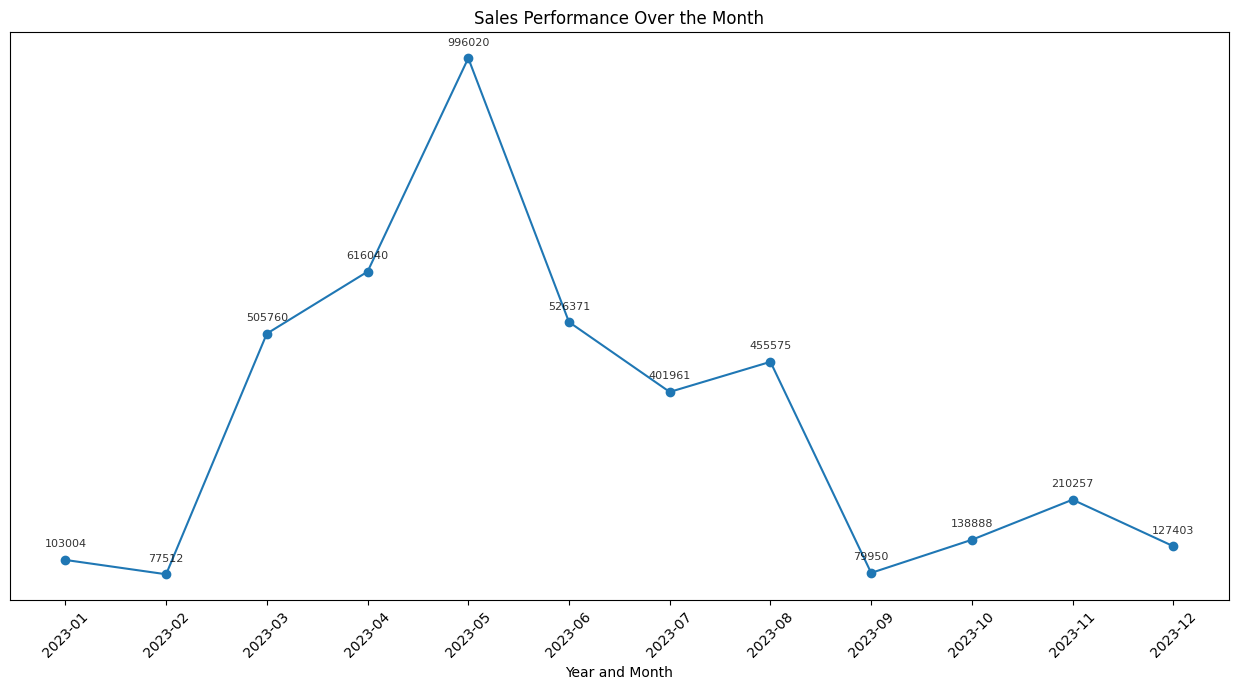

In [ ]:
# # Extract the month and year from 'Transaction Date'
# df['YearMonth'] = df['Transaction Date'].dt.strftime('%Y-%m')

# Group the data by month and calculate the total sales for each month
monthly_sales = df.groupby('YearMonth')['Total_SalesNGN'].sum().reset_index()

# Create a line plot to visualize the monthly sales trend
plt.figure(figsize=(13, 7))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Total_SalesNGN'], marker='o', linestyle='-')
plt.title('Sales Performance Over the Month')
plt.xlabel('Year and Month')
plt.ylabel('Total Sales (NGN)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()

# Annotate data points with prices (not too visible)
for x, y in zip(monthly_sales['YearMonth'], monthly_sales['Total_SalesNGN']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 9), ha='center', fontsize=8, alpha=0.8)

# Remove numeric y-values from the y-axis
plt.gca().axes.get_yaxis().set_visible(False)


# Show the plot
plt.show()


## What is the distribution of sales across different currencies?

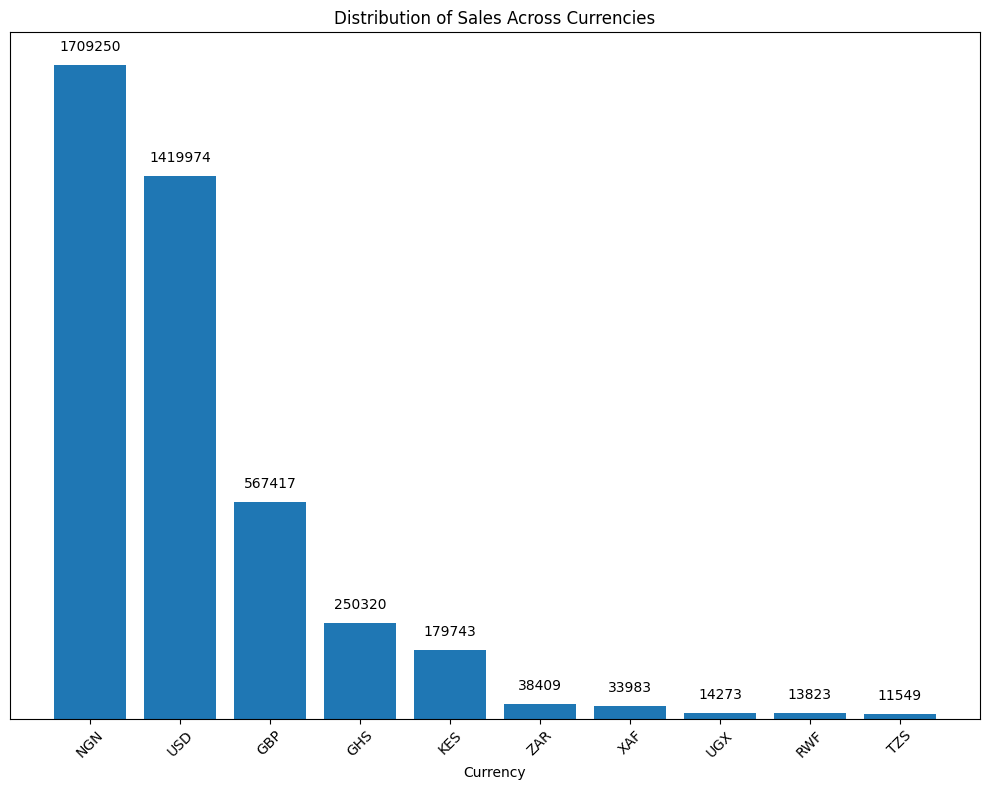

In [ ]:
# Group the data by currency and calculate the total sales for each currency
currency_sales = df.groupby('Currency')['Total_SalesNGN'].sum().reset_index()

# Sort the data by total sales in descending order
currency_sales = currency_sales.sort_values(by='Total_SalesNGN', ascending=False)

# Create a bar chart to visualize the distribution of sales across currencies
plt.figure(figsize=(10, 8))
plt.bar(currency_sales['Currency'], currency_sales['Total_SalesNGN'])
plt.title('Distribution of Sales Across Currencies')
plt.xlabel('Currency')
plt.ylabel('Total Sales (NGN)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Annotate the bars with the sales values
for x, y in zip(currency_sales['Currency'], currency_sales['Total_SalesNGN']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Remove numeric y-values from the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


## What is the average profit margin for each currency used in transactions?

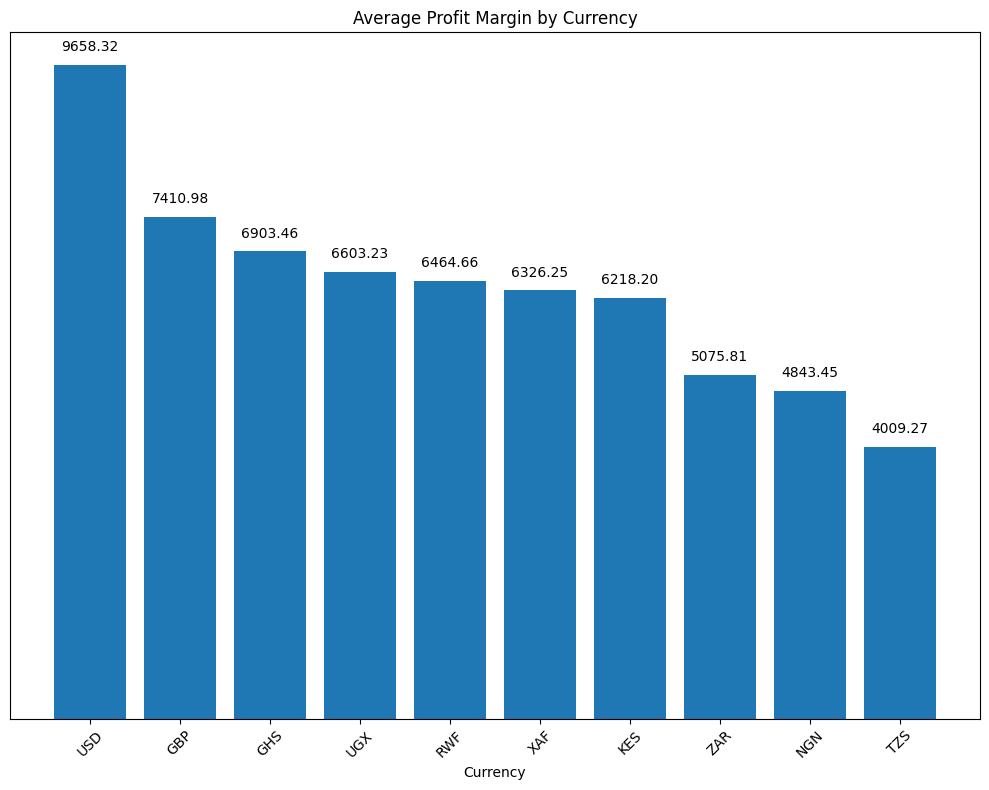

In [ ]:
# Calculate the average profit margin for each currency
currency_profit_margin = df.groupby('Currency')['Profit_NGN'].mean().reset_index()

# Sort the data by average profit margin in descending order
currency_profit_margin = currency_profit_margin.sort_values(by='Profit_NGN', ascending=False)

# Create a bar chart to visualize the average profit margin for each currency
plt.figure(figsize=(10, 8))
plt.bar(currency_profit_margin['Currency'], currency_profit_margin['Profit_NGN'])
plt.title('Average Profit Margin by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Profit Margin (NGN)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Annotate the bars with the average profit margin values
for x, y in zip(currency_profit_margin['Currency'], currency_profit_margin['Profit_NGN']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Remove numeric y-values from the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


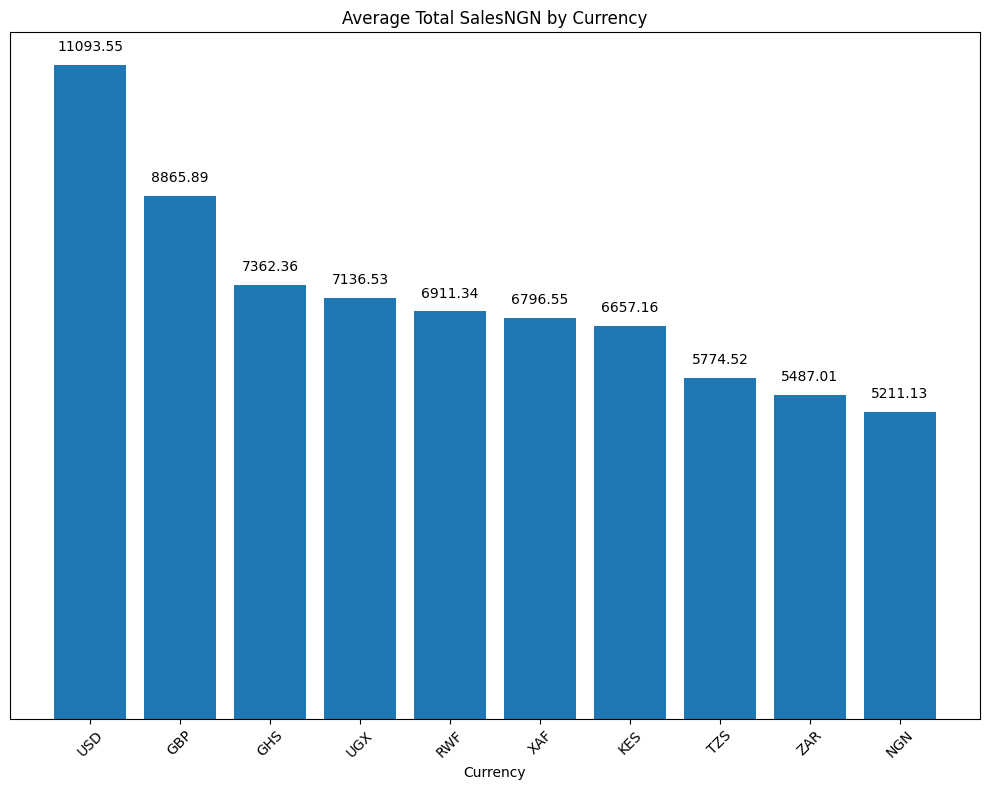

In [ ]:
# Calculate the average transaction value for each currency
average_transaction_value_by_currency = df.groupby('Currency')['Total_SalesNGN'].mean().reset_index()

# # Display the average transaction value for each currency
# print("Average Transaction Value for Each Currency:")
# print(average_transaction_value_by_currency)

# Sort the data by average profit margin in descending order
average_currency_value = average_transaction_value_by_currency.sort_values(by="Total_SalesNGN",ascending=False)

# Create a bar chart to visualize the average profit margin for each currency
plt.figure(figsize=(10, 8))
plt.bar(average_currency_value['Currency'], average_currency_value['Total_SalesNGN'])
plt.title('Average Total SalesNGN by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Total SalesNGN (NGN)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Annotate the bars with the average profit margin values
for x, y in zip(average_currency_value['Currency'], average_currency_value['Total_SalesNGN']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Remove numeric y-values from the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()



## Which day is the most common day of the week for sales?

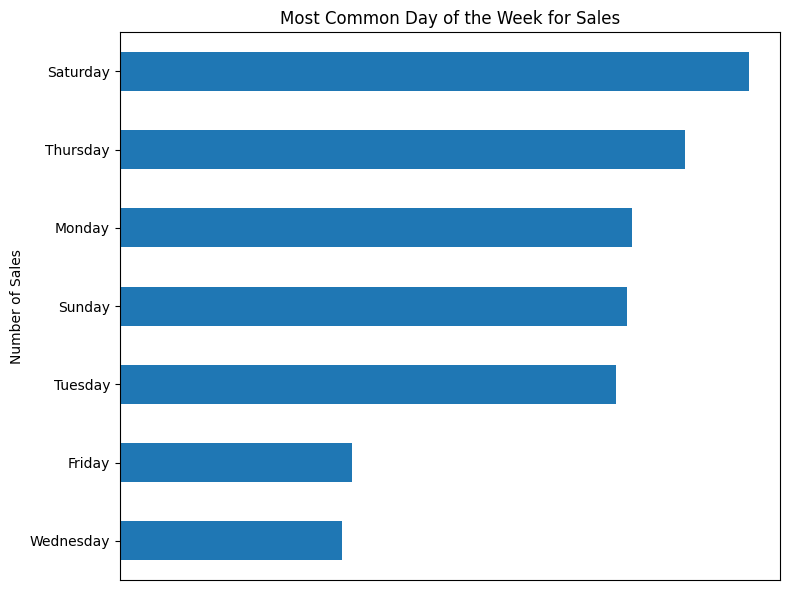

The most common day of the week for book sales is Saturday.


In [ ]:
# Extract the day of the week from the index and count occurrences
day_of_week_counts = df.index.day_name().value_counts(ascending=True)

# Create a bar chart to visualize the most common day of the week for sales
plt.figure(figsize=(8, 6))
day_of_week_counts.plot(kind='barh')
plt.title('Most Common Day of the Week for Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.grid(axis='y')

# Remove numeric y-values from the y-axis
plt.gca().axes.get_xaxis().set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# Find the day with the highest number of sales
most_common_day = day_of_week_counts.idxmax()
print(f"The most common day of the week for book sales is {most_common_day}.")

#Are there specific hours of the day when sales peak?

The specific hour(s) when sales peak: 11, 17 o'clock.


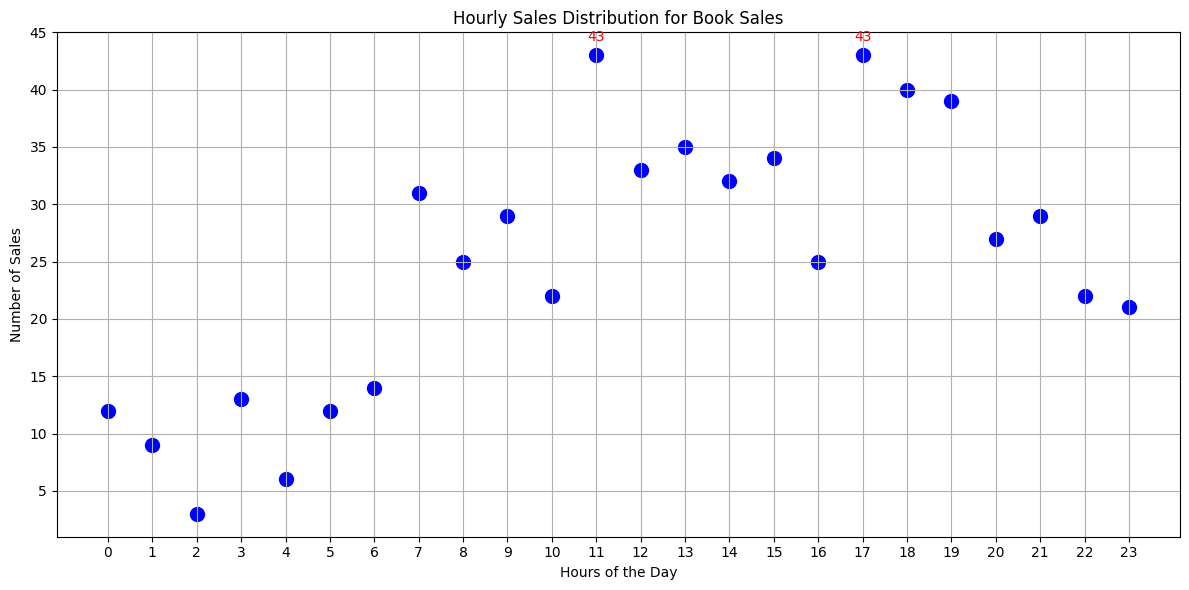

In [ ]:

# Extract the hour from the index and count occurrences
hourly_sales_counts = df.index.hour.value_counts().sort_index()

# Create a scatter plot to visualize the specific hours of the day when sales peak
plt.figure(figsize=(12, 6))
plt.scatter(hourly_sales_counts.index, hourly_sales_counts.values, marker='o', s=100, c='b', label='Sales')
plt.title('Hourly Sales Distribution for Book Sales')
plt.xlabel('Hours of the Day')
plt.ylabel('Number of Sales')
plt.xticks(range(24))  # Show all hours on the x-axis
plt.grid(True)

# Find the hour(s) with the highest number of sales
peak_hours = hourly_sales_counts[hourly_sales_counts == hourly_sales_counts.max()].index
print(f"The specific hour(s) when sales peak: {', '.join(map(str, peak_hours))} o'clock.")

# Annotate the peak hours on the scatter plot
for hour, count in zip(hourly_sales_counts.index, hourly_sales_counts.values):
    if hour in peak_hours:
        plt.annotate(f'{count}', (hour, count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='r')

# Show the plot
plt.tight_layout()
plt.show()


## What is the total profit generated from book sales throughout the year?

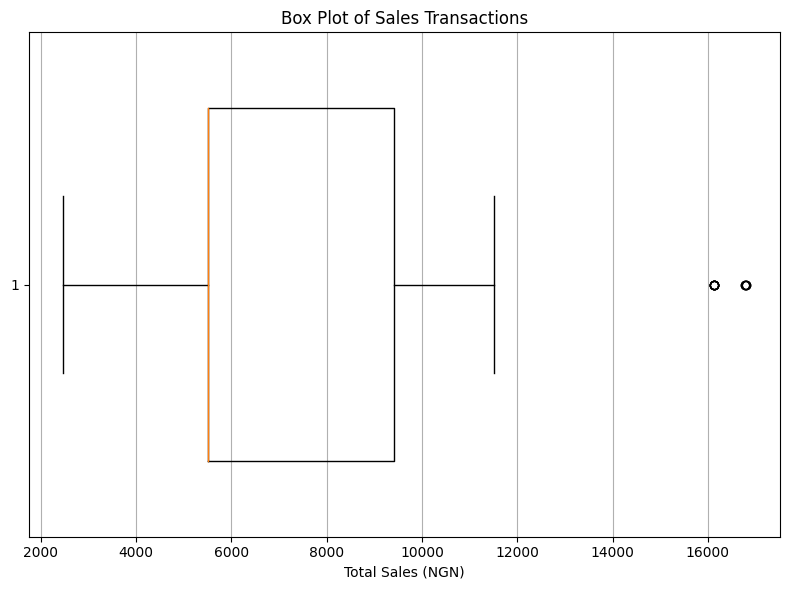

In [ ]:
# Create a box plot to identify outliers in sales transactions
plt.figure(figsize=(8, 6))
plt.boxplot(df['Total_SalesNGN'], vert=False, widths=0.7)
plt.title('Box Plot of Sales Transactions')
plt.xlabel('Total Sales (NGN)')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()


## How does the profit margin vary by month

Total Profit Generated from Book Sales Throughout the Year: NGN 3803144.46


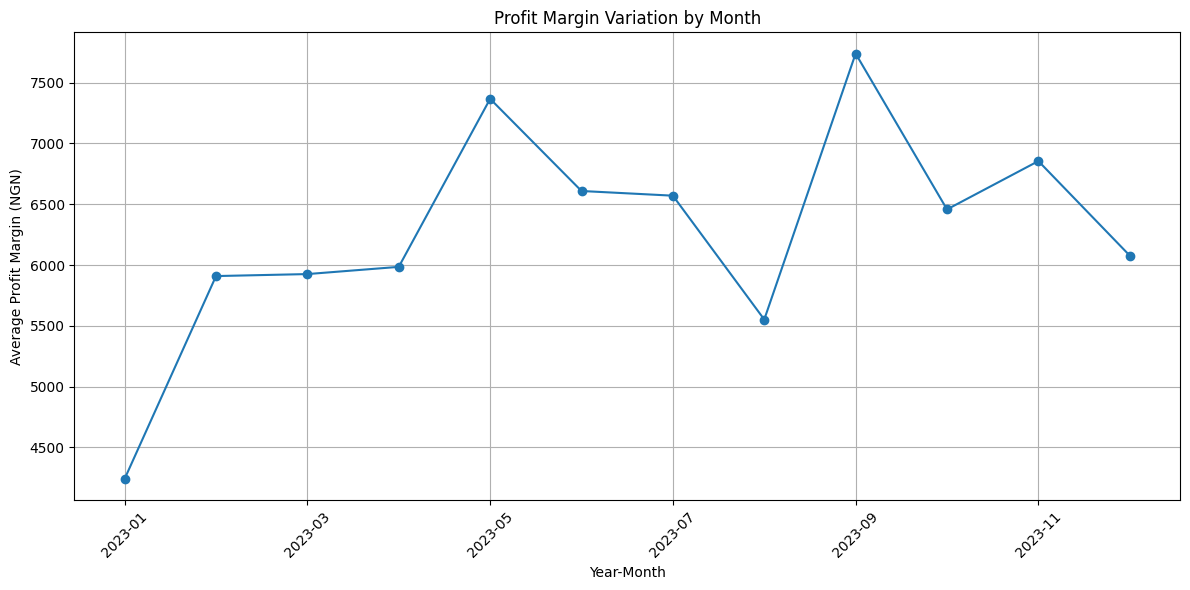

In [ ]:
# Calculate the total profit generated from book sales throughout the year
total_profit = df['Profit_NGN'].sum()
print(f'Total Profit Generated from Book Sales Throughout the Year: NGN {total_profit:.2f}')

# Group the data by month and calculate the average profit margin for each month
monthly_profit_margin = df.groupby('YearMonth')['Profit_NGN'].mean()

# Create a line plot to visualize the profit margin variation by month
plt.figure(figsize=(12, 6))
monthly_profit_margin.plot(marker='o', linestyle='-')
plt.title('Profit Margin Variation by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Profit Margin (NGN)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
